<a href="https://colab.research.google.com/github/ndungu96/Moringa_DS_Core_WK7_IP_2022_10/blob/main/Moringa_DS_Core_WK7_IP_2022_10_Peter_Karuku_Financial_Inclusion_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Financial Inclusion Analysis**

##**[1] DEFINING THE QUESTION**

###**a) Specifying the Data Analytic Question**

Figuring out how we can predict which individuals are most likely to have or use a bank account

###**b) Defining the Metric for Success**

In order to be successful in this project we should aim to:
1. Help in providing an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda
2. Providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

###**c) Understanding the context** 

Financial inclusion is defined as the availability and equality of opportunities to access financial services. It refers to a process by which individuals and businesses can access appropriate, affordable, and timely financial products and services.

Financial Inclusion remains one of the main obstacles to economic and human development in Africa.
Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

###**d) Recording the experimental design**

The following are the steps that we will take to conduct this project. They are listed below:



* loading the required libraries
* loading the data set
* check the data
* data preparation
* validate the data
* performing Exploratory Data Analysis
* implementing the solution
* challenging the solution
* draw conclusions (follow-up questions)
















###**e) Data Relevance**

This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

* FinAccess Kenya 2018. [(link)](https://www.fsdkenya.org/blogs-publications/publications/2018-annual-report/)
* Finscope Rwanda 2016. [(link)](http://www.statistics.gov.rw/publication/finscope-rwanda-2016)
* Finscope Tanzania 2017. [(link)](https://www.fsdt.or.tz/finscope/)
* Finscope Uganda 2018. [(link)](https://fsduganda.or.ug/finscope-2018-survey-report/)

##**[2] Importing Libraries**

In [197]:
#Importing pandas
import pandas as pd

# Importing Numpy
import numpy as np

# Importing Seaborn
import seaborn as sns

# Importing Matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

##**[3] READING THE DATASET**

In [198]:
# loading our finance dataset

df_fi = pd.read_csv('http://bit.ly/FinancialDataset')

# previewing the table
df_fi.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [199]:
#loading the variable definitions dataset
df_vd = pd.read_csv('http://bit.ly/VariableDefinitions')
df_vd

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


##**[4] REVIEWING THE DATASET**

In [200]:
#Checking the number of rows and columns

df_fi.shape

(23524, 13)

***There are 23524 rows and 13 columns***

In [201]:
# Checking whether each column has an appropriate datatype

df_fi.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [202]:
# Checking for duplicates

df_fi.duplicated().any()

False

In [203]:
# Checking for null values

df_fi.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [204]:
# Checking how many unique values are in our columns

df_fi.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [205]:
for col in df_fi.columns.to_list():
  print(f'{col} column unique values: ')
  print(df_fi[col].unique(), end='\n\n')
  print('----------------------------------------------------------------------------------')

country column unique values: 
['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']

----------------------------------------------------------------------------------
year column unique values: 
[2018 2029 2056 2016 2039 2017]

----------------------------------------------------------------------------------
uniqueid column unique values: 
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']

----------------------------------------------------------------------------------
Has a Bank account column unique values: 
['Yes' 'No' nan]

----------------------------------------------------------------------------------
Type of Location column unique values: 
['Rural' 'Urban' nan]

----------------------------------------------------------------------------------
Cell Phone Access column unique values: 
['Yes' 'No' nan]

----------------------------------------------------------------------------------
household_size column unique values: 
[ 3.  5.  8.  7.  1

*   ***2029,2056,2039***  are anomalies in the 'year' column given that we are working with years 2016 to 2018
*   ***0***  is an anomaly in the 'household_size' column
*   ***'6'***  is an anomaly in the 'education_level' column



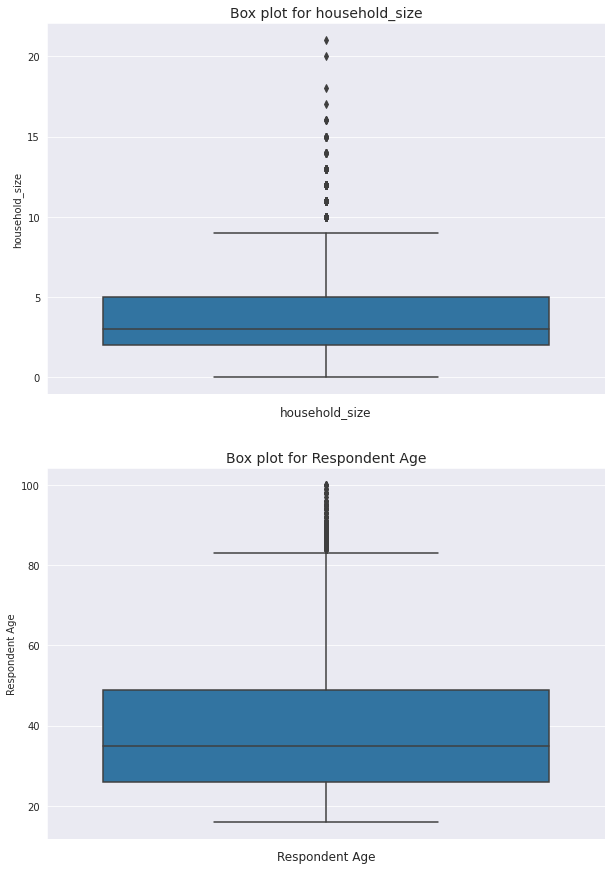

In [206]:
# Checking for Outliers

columns= ['household_size', 'Respondent Age',]

fig, ax = plt.subplots(len(columns), figsize=(10,15))

for i, col_val in enumerate(columns):

    sns.boxplot(y=df_fi[col_val], ax=ax[i])
    ax[i].set_title('Box plot for {}'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)

##**[5] CLEANING THE DATASET**

In [207]:
# Rename columns

df_fi2 = df_fi.rename(columns={'Has a Bank account':'has_bankacc', 'Type of Location':'location', 'Cell Phone Access':'cellphone',  
'Respondent Age':'age', 'gender_of_respondent': 'gender', 'The relathip with head':'r/ship_with_head', 'Level of Educuation':'level_of_education', 
'Type of Job':'type_of_job'})
df_fi2.columns

Index(['country', 'year', 'uniqueid', 'has_bankacc', 'location', 'cellphone',
       'household_size', 'age', 'gender', 'r/ship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

In [208]:
#drop 'uniqueid' column

df_fi3 = df_fi2.drop(columns='uniqueid')
df_fi3.columns

Index(['country', 'year', 'has_bankacc', 'location', 'cellphone',
       'household_size', 'age', 'gender', 'r/ship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

*The 'uniqueid' column is not required for our data analysis*

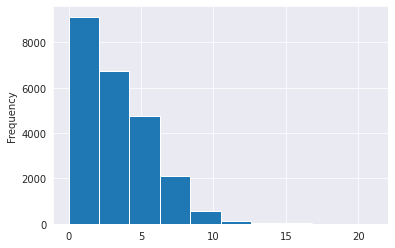

In [209]:
# Plotting a histogram for 'household size' column

df_fi3['household_size'].plot.hist()

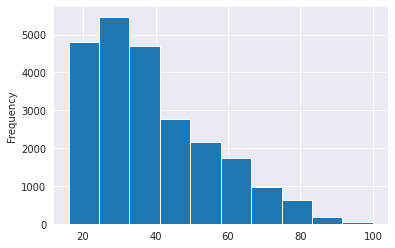

In [210]:
# Plotting a histogram for 'Respondent Age' column

df_fi3['age'].plot.hist()

***After plotting both histograms, the outliers do not seem to affect the dataset. Therefore there's no need to remove them.***

In [211]:
df_fi3.shape

(23524, 12)

In [212]:
# Removing the anomalies in year column

df_fi4 = df_fi3[df_fi3['year'].isin([2029,2056,2039])].index
df_fi3.drop(index=df_fi4, inplace=True)

*Removing years past 2018 as it isn't part of our data analysis*

In [213]:
df_fi3.shape

(23521, 12)

In [214]:
# no. of records with '6' in the 'level_of_education' column

df_fi3[(df_fi3['level_of_education'] == '6')].shape

(27, 12)

In [215]:
# Removing the anomalies in 'level_of_education' column

df_fi5 = df_fi3[df_fi3['level_of_education'] == '6'].index
df_fi3.drop(index=df_fi5, inplace=True)

*Records that have this anomaly amonunt to small no. of records compared to the total no. hence we can remove them.*

In [216]:
df_fi3.shape

(23494, 12)

In [217]:
# no. of records with '0' in the 'household_size' column

df_fi3[(df_fi3['household_size'] == 0)].shape

(36, 12)

In [218]:
# Removing the anomalies in 'household_size' column
df_fi3.drop(df_fi3.index[df_fi3['household_size'] == 0], inplace = True)

*Having '0'/no people in a household does not make sense. Also the records that have this anomaly amonunt to small no. of records compared to the total hence we can remove them.*

In [219]:
df_cd = df_fi3
df_cd.head()

,country,year,has_bankacc,location,cellphone,household_size,age,gender,r/ship_with_head,marital_status,level_of_education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [220]:
df_cd.shape

(23458, 12)

***The final dataset that we will use has 23458 rows and 12 columns***

##**[6] EXPLORATORY ANALYSIS**

###**a) UNIVARIATE ANALYSIS**

####**Measures of Central Tendency**

In [221]:
# Describing the numerical variables

df_cd[['household_size','age']].describe()

,household_size,age
count,23430.000000,23424.000000
mean,3.687239,38.766052
std,2.276766,16.475404
min,1.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [222]:
# Finding mode for 'household_size' column
df_cd.household_size.mode()

0    2.0
dtype: float64

The moast ocurring household size was 2

In [223]:
# Finding mode for 'age' column
df_cd.age.mode()

0    30.0
dtype: float64

most repondents were of age 30

In [224]:
# Finding median for 'household_size' column
df_cd.household_size.median()

3.0

The median value of the household size was 3

In [225]:
# Finding median for 'age' column
df_cd.age.median()

35.0

The median value of the respondents age was 35

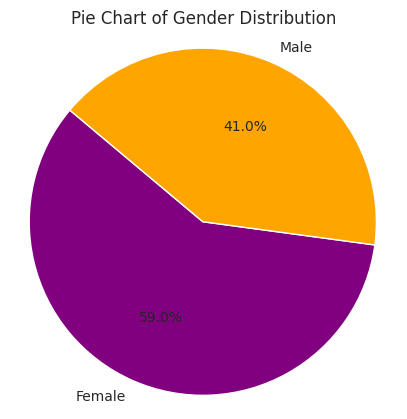

In [226]:
# Creating a pie chart of the percentage of count of values in 'gender' column

# Finding the count of values of the elements in 'bank_account' column
gender = df_cd.gender.value_counts()
gender

# Assigning the colums to 'element' and 'size' variables
element = gender.values
size = gender.index

# Specifying the colors of the pie chart
colors = ['purple', 'orange']

# plotting the pie chart
plt.figure(figsize = (5,5), dpi = 100)
plt.pie(element, labels=size, colors=colors, autopct ='%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Gender Distribution')
plt.show()

There were slightly more female than male respondents 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


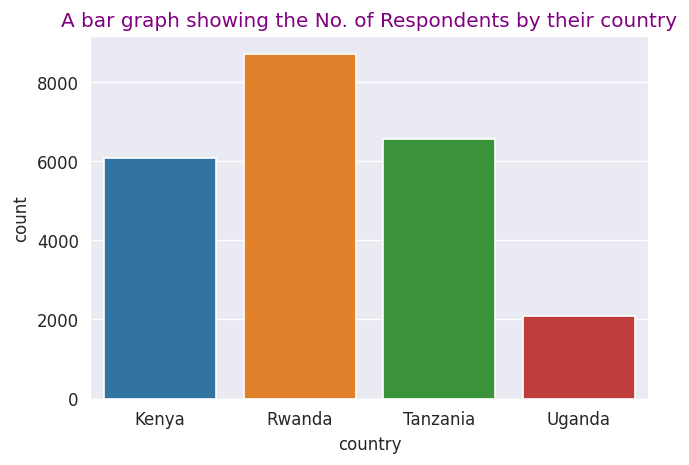

In [227]:
# A bar chart showing the respondents in the 4 countries
plt.figure(dpi = 120)
sns.set_style('darkgrid')
sns.countplot(df_cd.country)
plt.title('A bar graph showing the No. of Respondents by their country', color = 'purple')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


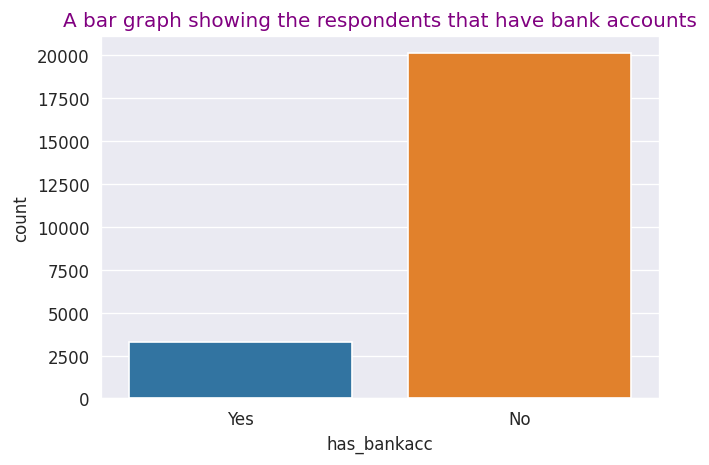

In [228]:
# A bar chart showing the respondents that have bank accounts
plt.figure(dpi = 120)
sns.set_style('darkgrid')
sns.countplot(df_cd.has_bankacc)
plt.title('A bar graph showing the respondents that have bank accounts', color = 'purple')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


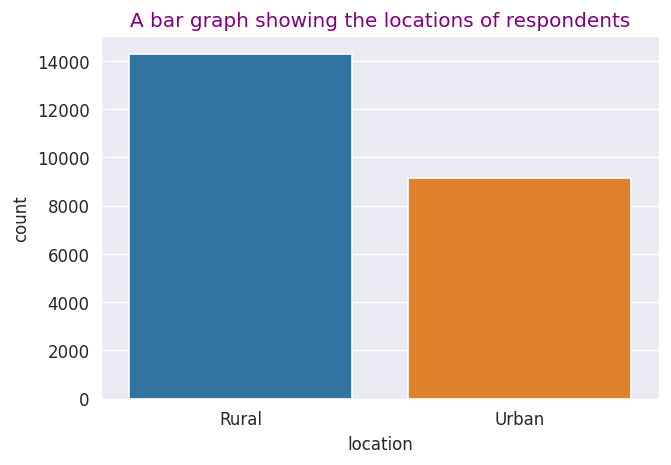

In [229]:
# A bar chart showing the locations of respondents
plt.figure(dpi = 120)
sns.set_style('darkgrid')
sns.countplot(df_cd.location)
plt.title('A bar graph showing the locations of respondents', color = 'purple')
plt.show()

1. **Majority of the respondents were from rural areas**
2. **Rwanda had the highest number of respondents**
3. **Majority of the respondents do not have bank accounts**

###**b) BIVARIATE ANALYSIS**

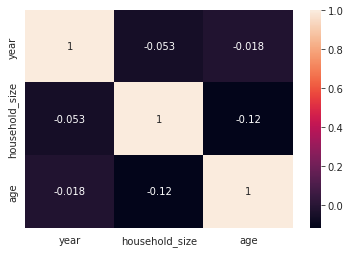

In [230]:
# A heatmap to show correlation between numerical variables

sns.heatmap(df_cd.corr(), xticklabels = df_cd.corr().columns, yticklabels = df_cd.corr().columns, annot=True)

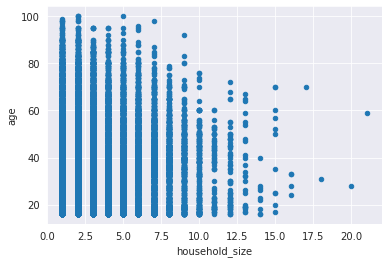

In [231]:
# Plotting a scatter plot of the household size and respondents age

df_cd.plot(x = 'household_size', y = 'age', kind='scatter')

There appears to be no correlation between the ages of the respondents in the sample and the house size.

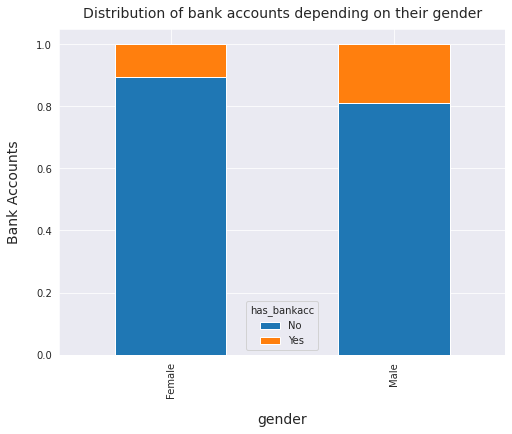

In [232]:
# A stacked bar chart of gender and has_bankacc

gender = df_cd.groupby('gender')['has_bankacc'].value_counts(normalize=True).unstack()
gender.plot(kind='bar', figsize=(8, 6), stacked=True)

# The chart title
plt.title('Distribution of bank accounts depending on their gender', fontsize=14, y=1.015)

# y-axis label
plt.ylabel('Bank Accounts', fontsize=14, labelpad=15)

# x-axis label
plt.xlabel('gender', fontsize=14, labelpad=15)

plt.show()

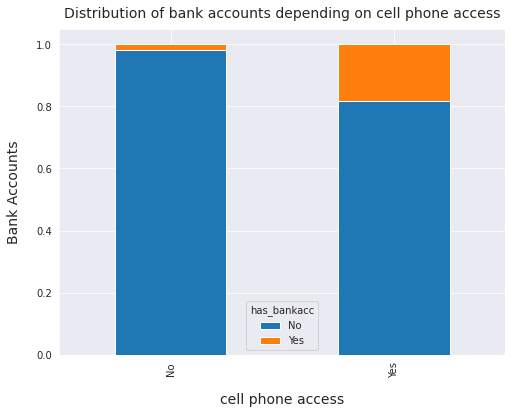

In [233]:
# plotting a stacked bar chart of cell phone access and has_bankacc

phone_access = df_cd.groupby('cellphone')['has_bankacc'].value_counts(normalize=True).unstack()
phone_access.plot(kind='bar', figsize=(8, 6), stacked=True)

# The chart title
plt.title('Distribution of bank accounts depending on cell phone access', fontsize=14, y=1.015)

# y-axis label
plt.ylabel('Bank Accounts', fontsize=14, labelpad=15)

# x-axis label
plt.xlabel('cell phone access', fontsize=14, labelpad=15)

plt.show()

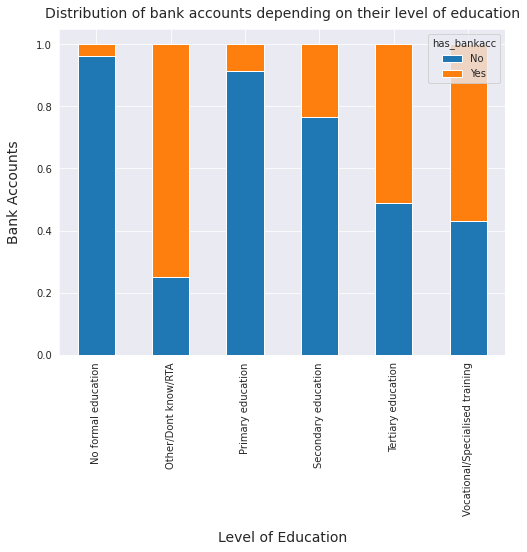

In [234]:
# A stacked bar chart of level of education and has_bankacc

country = df_cd.groupby('level_of_education')['has_bankacc'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)

# The chart title
plt.title('Distribution of bank accounts depending on their level of education', fontsize=14, y=1.015)

#  y-axis label
plt.ylabel('Bank Accounts', fontsize=14, labelpad=15)

# x-axis label
plt.xlabel('Level of Education', fontsize=14, labelpad=15)

plt.show()

Indidviduals with /Specialised training are more likely to have bank accounts closely followed by those with Tertiary education

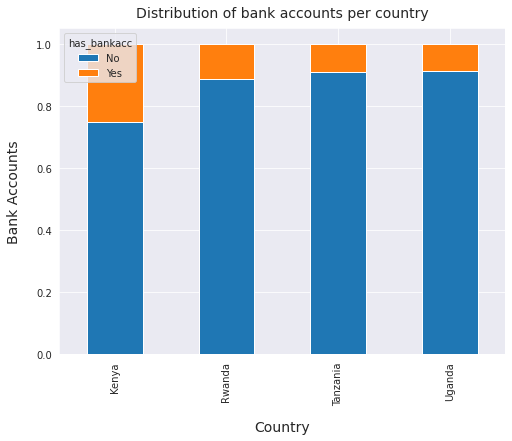

In [235]:
# A stacked bar chart of country and has_bankacc

country = df_cd.groupby('country')['has_bankacc'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)

# The chart title
plt.title('Distribution of bank accounts per country', fontsize=14, y=1.015)

#  y-axis label
plt.ylabel('Bank Accounts', fontsize=14, labelpad=15)

# x-axis label
plt.xlabel('Country', fontsize=14, labelpad=15)

plt.show()

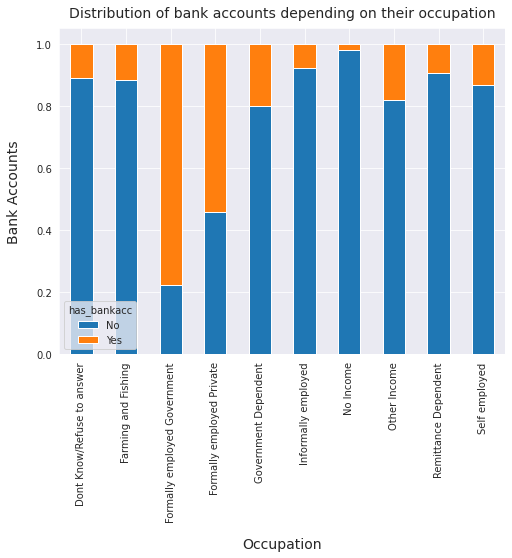

In [236]:
# A stacked bar chart of type of job and has_bankacc


country = df_cd.groupby('type_of_job')['has_bankacc'].value_counts(normalize=True).unstack()
country.plot(kind='bar', figsize=(8, 6), stacked=True)

# The chart title
plt.title('Distribution of bank accounts depending on their occupation', fontsize=14, y=1.015)

#  y-axis label
plt.ylabel('Bank Accounts', fontsize=14, labelpad=15)

# x-axis label
plt.xlabel('Occupation', fontsize=14, labelpad=15)

plt.show()

Individuals employed by the government are more likely to have bank accounts followed by those that are employed privately.

Those without income are least likely to have a bank account

###**c) MULTIVARIATE ANALYSIS**

In [237]:
# Making a copy of our dataframe

df_ma = df_cd.copy()

In [238]:
df_ma.columns

Index(['country', 'year', 'has_bankacc', 'location', 'cellphone',
       'household_size', 'age', 'gender', 'r/ship_with_head', 'marital_status',
       'level_of_education', 'type_of_job'],
      dtype='object')

#### Principal Component Analysis

In [239]:
# Importing label encoder to convert our categorical data into numbers

le=LabelEncoder()

df_ma['country']=le.fit_transform(df_ma['country'].astype(str))
df_ma['has_bankacc']=le.fit_transform(df_ma['has_bankacc'].astype(str))
df_ma['location']=le.fit_transform(df_ma['location'].astype(str))
df_ma['cellphone']=le.fit_transform(df_ma['cellphone'].astype(str))
df_ma['gender']=le.fit_transform(df_ma['gender'].astype(str))
df_ma['r/ship_with_head']=le.fit_transform(df_ma['r/ship_with_head'].astype(str))
df_ma['marital_status']=le.fit_transform(df_ma['marital_status'].astype(str))
df_ma['level_of_education']=le.fit_transform(df_ma['level_of_education'].astype(str))
df_ma['type_of_job']=le.fit_transform(df_ma['type_of_job'].astype(str))

df_ma.head()

,country,year,has_bankacc,location,cellphone,household_size,age,gender,r/ship_with_head,marital_status,level_of_education,type_of_job
0,0,2018,1,0,1,3.0,24.0,0,5,2,3,9
1,0,2018,0,0,0,5.0,70.0,0,1,4,0,4
2,0,2018,1,1,1,5.0,26.0,1,3,3,5,9
3,0,2018,0,0,1,5.0,34.0,0,1,2,2,3
4,0,2018,0,1,0,8.0,26.0,1,0,3,2,5


In [240]:
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
# 
X = df_ma.drop('year', 1)
y = df_ma['cellphone']
print(X)
print('******************************************************************************************************')
print(y)

       country  has_bankacc  location  cellphone  household_size   age  \
0            0            1         0          1             3.0  24.0   
1            0            0         0          0             5.0  70.0   
2            0            1         1          1             5.0  26.0   
3            0            0         0          1             5.0  34.0   
4            0            0         1          0             8.0  26.0   
...        ...          ...       ...        ...             ...   ...   
23519        3            0         0          1             4.0  48.0   
23520        3            0         0          1             2.0  27.0   
23521        3            0         0          1             5.0  27.0   
23522        3            0         1          1             7.0  30.0   
23523        3            0         0          1            10.0  20.0   

       gender  r/ship_with_head  marital_status  level_of_education  \
0           0                 5         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [241]:
# Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(       country  has_bankacc  location  cellphone  household_size   age  \
 591          0            0         0          1             5.0  35.0   
 13316        1            0         0          1             2.0  63.0   
 5009         0            0         1          1             8.0  17.0   
 13723        1            0         1          1             4.0  65.0   
 7342         1            0         0          1             4.0  42.0   
 ...        ...          ...       ...        ...             ...   ...   
 13138        1            0         0          1             7.0  31.0   
 19691        2            1         1          1             2.0  68.0   
 9854         1            0         0          1             5.0  18.0   
 10812        1            1         0          1             1.0  57.0   
 2734         0            0         1          1             3.0  25.0   
 
        gender  r/ship_with_head  marital_status  level_of_education  \
 591         1            

In [242]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Linear Discriminant Analysis

##**[7] IMPLEMENTING THE SOLUTION**

##**[8] CHALLENGING THE SOLUTION**

##**[9] FOLLOW-UP QUESTIONS**